# Using Data to Recommend a Movie Profile That Maximizes Profit and Popularity
#### By Nicholas Abell
In the hypothetical scenario in which Microsoft is exploring a possible market entrance into the movie making business, we will analyze over 3500 movies released since 1990, to generate an ideal movie profile based on the following;
* Movie Genre
* Budget
* Runtime
* Director
* Release Month
Our goal is to give Microsoft a framework to produce it's first blockbuster hit, that maximizes both profit and popularity.

## Loading Libraries & Custom Functions

In [137]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from clean_merge_function_imdb_meta import df_clean_merge
from clean_merge_function_imdb_meta import remove_outlier
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing & Cleaning Data

In [138]:
imdb_df = pd.read_csv('zippedData/imdb.movies.csv.zip')
metacritic_df = pd.read_csv('zippedData/metacritic_movies.csv')

In [139]:
df = df_clean_merge(imdb_df, metacritic_df, 1990)

In [140]:
genres = list(set([x for genre in [genres.split(', ') for genres in df['genre']] for x in genre]))

## Data Shape & Summary Stats

In [141]:
df.columns

Index(['imdb_id', 'title', 'release_date', 'genre', 'duration', 'director',
       'budget', 'domestic_income', 'worldwide_income', 'imdb_user_score',
       'metacritic_user_score', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'domestic_roi', 'worldwide_roi',
       'domestic_profit_loss', 'worldwide_profit_loss'],
      dtype='object')

In [142]:
df.shape

(3582, 35)

In [143]:
df.describe()

,duration,budget,domestic_income,worldwide_income,imdb_user_score,metacritic_user_score,Action,Adventure,Animation,Biography,...,Romance,Sci-Fi,Sport,Thriller,War,Western,domestic_roi,worldwide_roi,domestic_profit_loss,worldwide_profit_loss
count,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,...,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3.582000e+03,3582.000000,3582.000000
mean,104.562814,30.458459,42.124623,85.521608,256.882189,6.659872,0.192071,0.142658,0.047739,0.050530,...,0.195980,0.059464,0.033501,0.147404,0.010329,0.007259,461.726689,7.744199e+02,11.666611,55.063568
std,16.839066,39.518964,71.461124,181.858047,434.444970,1.327069,0.393984,0.349772,0.213243,0.219067,...,0.397009,0.236524,0.179965,0.354557,0.101122,0.084899,12654.704973,2.263689e+04,49.988152,153.924062
min,63.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-176.900000,-111.000000
25%,93.000000,5.000000,1.700000,2.300000,51.000000,6.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,3.600000e+01,-7.800000,-3.500000
50%,101.000000,18.000000,17.650000,22.550000,132.000000,6.659872,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,1.370000e+02,-0.400000,3.150000
75%,113.750000,39.750000,51.900000,87.650000,288.750000,7.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.750000,3.190000e+02,16.775000,51.075000
max,271.000000,356.000000,936.700000,2797.800000,8302.000000,9.400000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,719459.000000,1.289039e+06,691.700000,2553.000000


# Analysis:

## Choosing a Genre
Our goal in this section is to recommend a set of genre tags by identifying which offer the high worldwide profit, strong ROI, and high audience rating and popularity.

In [144]:
df1 = remove_outlier(df, 'worldwide_profit_loss')
avg_wpl_by_genre = []
for genre in genres:
    avg_wpl_by_genre.append((df1[df1[genre]==1].worldwide_profit_loss.mean(), genre))
avg_wpl_by_genre.sort()
g1 = [name[1] for name in avg_wpl_by_genre]
avg_wpl = [pl[0] for pl in avg_wpl_by_genre]

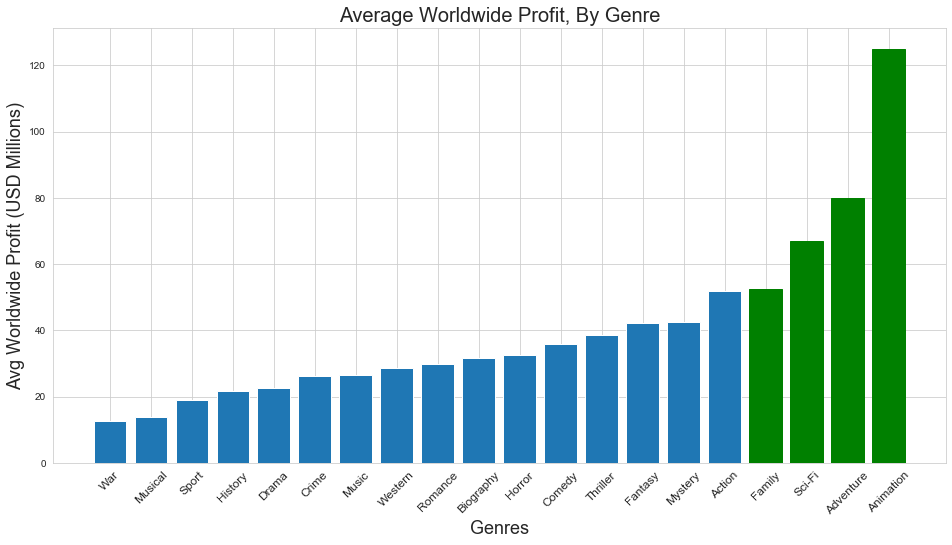

In [159]:
fig, wpl=plt.subplots(figsize=(16,8))
bars = wpl.bar(x=g1, height=avg_wpl)
plt.xlabel('Genres', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Avg Worldwide Profit (USD Millions)', fontsize=18)
plt.title("Average Worldwide Profit, By Genre", fontsize=20)
bars[-4].set_color('g')
bars[-3].set_color('g')
bars[-2].set_color('g')
bars[-1].set_color('g')
plt.show(wpl)

In [146]:
df2 = remove_outlier(df, 'worldwide_roi')
avg_wroi_by_genre = []
for genre in genres:
    avg_wroi_by_genre.append((df2[df2[genre]==1].worldwide_roi.mean(), genre))
avg_wroi_by_genre.sort()
g2 = [name[1] for name in avg_wroi_by_genre]
avg_wroi = [roi[0] for roi in avg_wroi_by_genre]

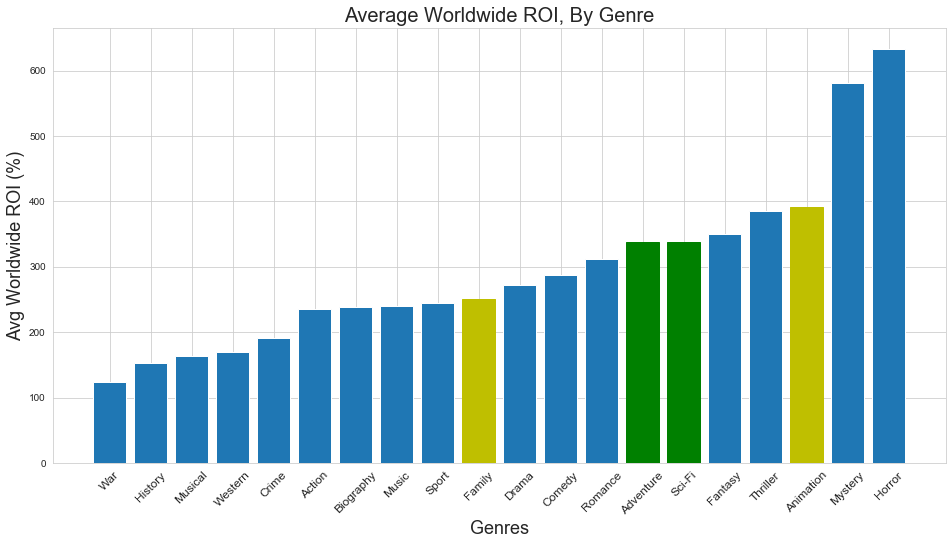

In [147]:
fig, wroi=plt.subplots(figsize=(16,8))
bars2 = wroi.bar(x=g2, height=avg_wroi)
plt.xlabel('Genres', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Avg Worldwide ROI (%)', fontsize=18)
plt.title("Average Worldwide ROI, By Genre", fontsize=20)
bars2[-7].set_color('g')
bars2[-6].set_color('g')
bars2[-3].set_color('y')
bars2[9].set_color('y')
plt.show(wroi)

### Movie Genre Historical Trends
Below is a historical timeseries going back to 1990, with annual movie release counts by our most porfitable genres.

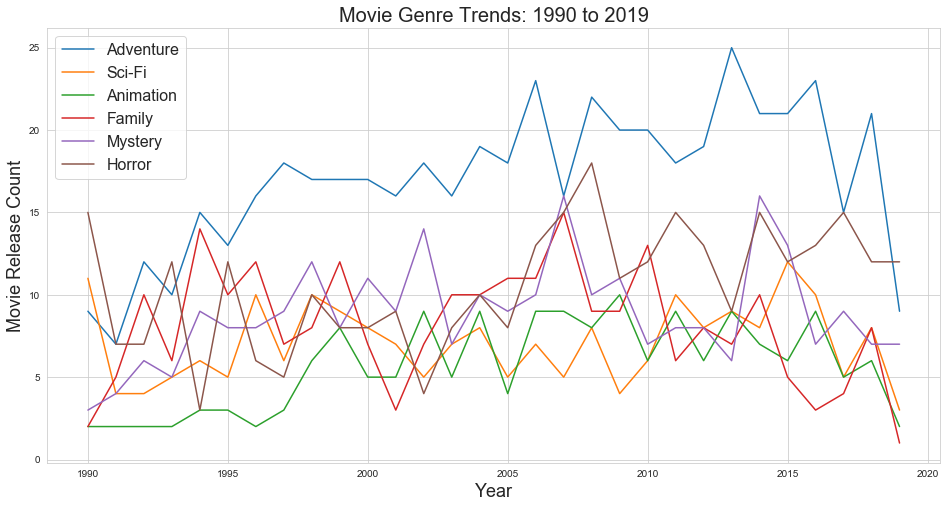

In [148]:
profit_genres = ['Adventure', 'Sci-Fi', 'Animation', 'Family', 'Mystery', 'Horror']
fig, ax = plt.subplots(figsize = (16,8))
for genre in profit_genres:
    data = dict(df[df[genre]==1].release_date.dt.year.value_counts().sort_index())
    x = list(data.keys())
    y = list(data.values())
    ax.plot(x, y, label=genre)
ax.legend(fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Movie Release Count', fontsize=18)
plt.title('Movie Genre Trends: 1990 to 2019', fontsize=20)
plt.show()

### Correlations
There are several meaningful relationships found when correlating the dataset using the heatmap plot method.
* The Metacritic user score, calculated as an avg rating between 0 and 10, has no correlation with domestic or worldwide box office.
* The IMDB user score, however, is strongly correlated with box office performance. This is because their scoring method is weighted by the volume of ratings, so more popular movies rank higher.
* Domestic and worldwide box office performance is also strongly correlated with production budget.

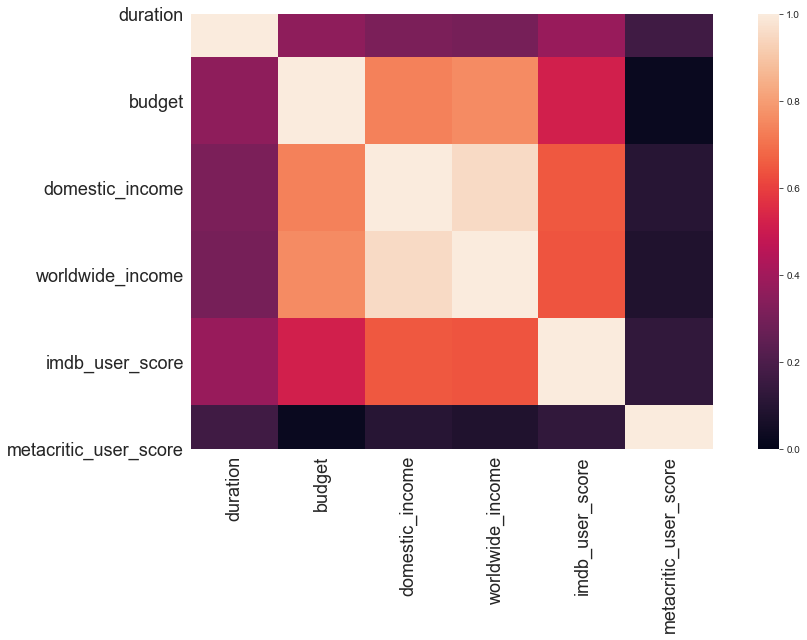

In [149]:
six_cols = list(df.describe())[0:6]
plt.figure(figsize = (16,8))
sns.heatmap(df[six_cols].corr(), square=True, vmin=0, vmax=1)
plt.yticks(fontsize=18, rotation = 0)
plt.xticks(fontsize=18)
plt.show()

### Nearing Our Conclusion
Based on the above analysis, if we were to choose a movie genre by audience score/popularity, we would use the IMDb score because of it's correlation with performance. Below, we will complete the process of identifying a recommended genre set by analyzing which genres are rated higher. 

In [150]:
df3 = remove_outlier(df, 'imdb_user_score')
avg_imdb_by_genre = []
for genre in genres:
    avg_imdb_by_genre.append((df[df[genre]==1].imdb_user_score.mean(), genre))
avg_imdb_by_genre.sort()
g3 = [name[1] for name in avg_imdb_by_genre]
avg_imdb = [score[0] for score in avg_imdb_by_genre]

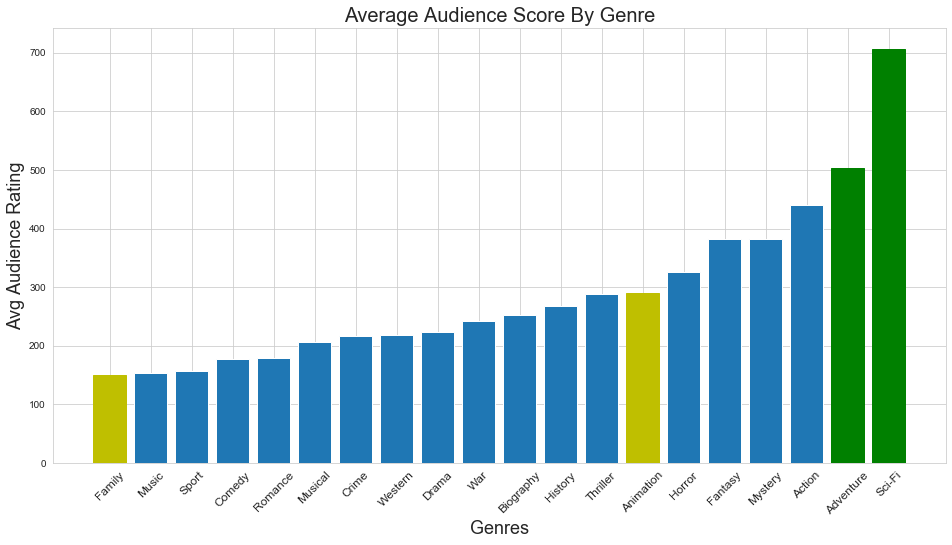

In [151]:
fig, imdb=plt.subplots(figsize=(16,8))
bars2 = imdb.bar(x=g3, height=avg_imdb)
plt.xlabel('Genres', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Avg Audience Rating', fontsize=18)
plt.title("Average Audience Score By Genre", fontsize=20)
bars2[0].set_color('y')
bars2[13].set_color('y')
bars2[-2].set_color('g')
bars2[-1].set_color('g')
plt.show(imdb)

### Choosing a Genre Conclusion
Based on the genre analysis above, we have drawn the following conclusions:
* Sci-Fi/Adventure movies are the most profitable *and* popular.
* Going off profitability alone, Animated/Family movies perform the best, but do not have high audience ratings.
* Going off ROI alone, Horror movies perform the highest, but this would limit total profit due to smaller audience size.
* We recommend that Microsoft create a Sci-Fi Adventure movie for their first project, due to them generating positive media attention and high profitability.

## Average Budget for Sci-Fi/Adventure Movies
The average budget for a Sci-Fi/Adventure movie would require a narrowed focus on movies made in the last 10 years, instead of the last 30.

In [152]:
ten_df = df_clean_merge(imdb_df, metacritic_df, 2009)
budget_df = ten_df[(ten_df['Sci-Fi']==1) & (ten_df['Adventure']==1)].budget
budget_df.mean()

173.42857142857142

### Recommended Budget
The average budget for Sci-Fi/Adventure movies released in the last 10 years is 173.5 million, and we recommend a similarly sized budget for Microsoft's first movie inbetween 170 and 180 million.

## Average Runtime Analysis
In this section, we take a quick look at the average runtime/movie length (in minutes) of the recommended genre, Sci-Fi/Adventure, in order to recommend a runtime range for Microsoft's movie project.

In [153]:
runtimes_df = df[(df['Sci-Fi']==1) & (df['Adventure']==1)].duration
runtimes_df.mean()

124.3013698630137

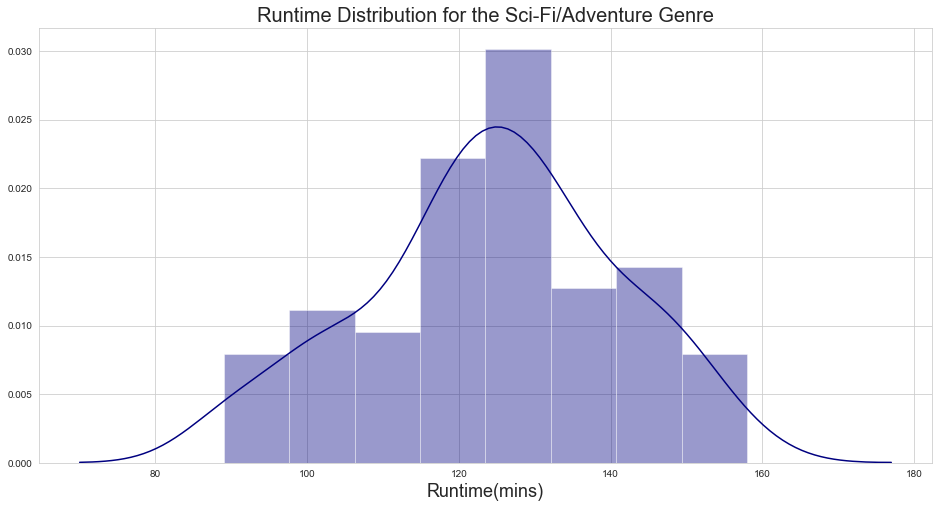

In [154]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,8))
art = sns.distplot(runtimes_df, color='navy')
plt.xlabel('Runtime(mins)', fontsize=18)
plt.title("Runtime Distribution for the Sci-Fi/Adventure Genre", fontsize=20)
plt.show(art)

### Runtime Conclusion
Based on the above analysis, we have determined that an optimal movie duration would be between 120 and 130 minutes (average Sci-Fi/Adventure movie length is 124 mins).

## Top 10 Directors by Total Worldwide Box Office and  Average Audience Score
Below, we will look at the top 10 highest performing directors in the Sci-Fi genre by two metrics; total worldwide box office, and average IMDb audience rating. This will allow us to recommend directors who have experience, high performance, and positive sentiment among audiences.

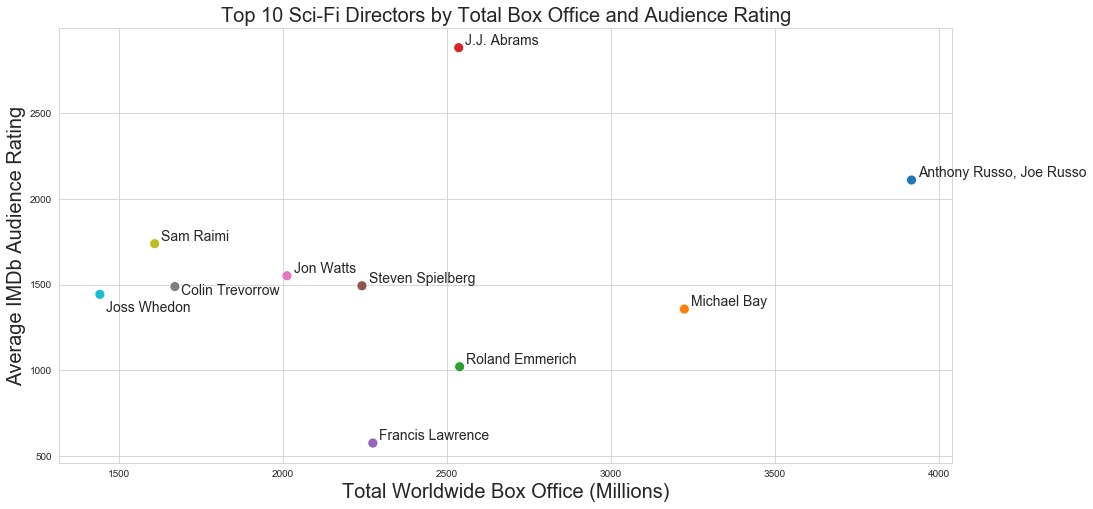

In [155]:
data1 = df[(df['Sci-Fi']==1) & (df['Adventure']==1)].groupby('director')\
                             .agg({'worldwide_income':'sum', 'imdb_user_score':'mean'})\
                             .sort_values("worldwide_income", ascending=False).head(10)
x1 = list(data1.worldwide_income)
y1 = list(data1.imdb_user_score)
fig, ax2 = plt.subplots(figsize=(16,8))
sns.scatterplot(x1, y1, hue=data1.index, s=100, axes=ax2)
for i,txt in enumerate(data1.index):
    if txt == 'Colin Trevorrow':
        ax2.annotate(txt, (x1[i]+20,y1[i]-50), fontsize=14)
    elif txt == 'Joss Whedon':
        ax2.annotate(txt, (x1[i]+20,y1[i]-100), fontsize=14)
    else:
        ax2.annotate(txt, (x1[i]+20,y1[i]+20), fontsize=14)
plt.xlabel('Total Worldwide Box Office (Millions)', fontsize=20)
plt.ylabel('Average IMDb Audience Rating', fontsize=20)
ax2.legend().remove()
plt.title('Top 10 Sci-Fi Directors by Total Box Office and Audience Rating', fontsize=20)
plt.show()

### Director Analysis Conclusion:
Based on the above analysis, assuming that a director has been involved in the Sci-Fi/Adventure genre before would be a better fit creatively, there are many great directors to choose from in the Sci-Fi/Adventure verticle. The top 3 directors to reach out to, considering total worldwide box office and average audience score, are:
* Anthony & Joe Russo (Russo Brothers)
* J.J. Abrams
* Michael Bay

## Best Release Month for Maximizing Domestic Box Office
Our final recommendation based on the analysis of the movie dataset involves a focused look at release dates; specifically which months of the year have the highest average domestic box office. This is a look across the entire dataset, and not specific genres.

In [156]:
df4 = remove_outlier(df, 'domestic_income')
months = [1,2,3,4,5,6,7,8,9,10,11,12]
avg_domestic_by_rmonth = []
for month in months:
    avg_domestic_by_rmonth.append((df4[df4['release_date'].dt.month==month]\
                                                          .domestic_income.mean(), month))
rmonths = [month[1] for month in avg_domestic_by_rmonth]
avg_dbo = [dbo[0] for dbo in avg_domestic_by_rmonth]

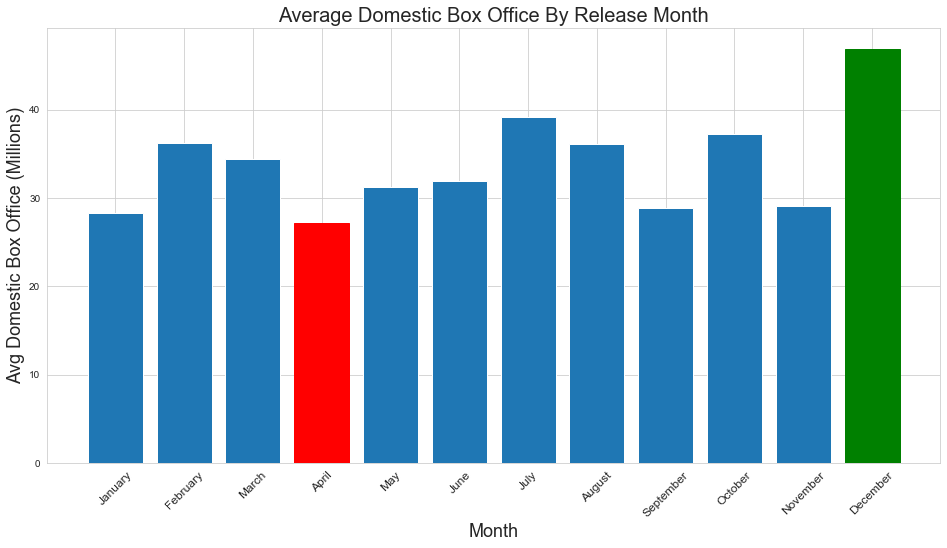

In [157]:
months_txt = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',\
             'October', 'November', 'December']
fig, rm=plt.subplots(figsize=(16,8))
bars3 = rm.bar(x=rmonths, height=avg_dbo)
plt.xlabel('Month', fontsize=18)
plt.xticks(list(range(1,13)), months_txt, rotation=45, fontsize=12)
plt.ylabel('Avg Domestic Box Office (Millions)', fontsize=18)
plt.title("Average Domestic Box Office By Release Month", fontsize=20)
bars3[3].set_color('r')
bars3[-1].set_color('g')
plt.show(rm)

### Recommended Release Month
Based on the above results, we recommend a release month of July or December.

# Conclusion
Combining the results of the analysis above into a recommended movie profile, we get;
* Genre: Sci-Fi/Adventure
* Budget Range: 170-180 million
* Runtime: 120-130 mins
* Directors: Anthony & Joe Russo, J.J. Abrams, or Michael Bay
* Release Month: December